## Bibliotecas

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Análise Exploratória de Dados

In [72]:
resenha = pd.read_csv("imdb-reviews-pt-br.csv")
resenha

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos


In [73]:
# Verificando o tipo de dado, tenho string e float
resenha.dtypes

id            int64
text_en      object
text_pt      object
sentiment    object
dtype: object

In [74]:
# Tamanho do dataset
resenha.shape
print('O dataset possui {} linhas e {} colunas'.format(resenha.shape[0], resenha.shape[1]))

O dataset possui 49459 linhas e 4 colunas


In [75]:
# Zero dados null na base 
resenha.isna().sum()

id           0
text_en      0
text_pt      0
sentiment    0
dtype: int64

## Separação dos dados para treino e teste com Train_Test_Split

In [76]:
#separei os dados como treino e teste, no primeiro parametro eu passo (resenhas.text_pt) que são os dados que o algoritimo deve separar 
# e no segundo parametro resenhas.sentiment que são os dados que ele deve treinar, e por fim o random que é minha SEED.

treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt,
                                                              resenha.sentiment,
                                                              random_state = 42)

## Aplicando o método de classificação 

#### Para construção desse modelo de machine learning eu vou usar o metodo de aprendizagem supervisionada com aplicação em classificacao 
#### Classificacao é uma tecnica para aprendizagem supervisionado, onde eu já rotulei os dados, então a maquina trabalha de acordo com essas entradas, esse algoritmo é usado para classificação binária, ou seja, é usado em problemas nos quais existem apenas duas classes. Ele traçar uma linha que divide o conjunto de dados em dois.

In [77]:
# Primeira etapa para esse processamento com ML é conhecer um pouco melhor os dados textuais,o algoritimo não interpreta dados string, apenas números 
# Então vou iniciar essa etapa conhecendo meus dados e analisando as criticas que foram feitas nos filmes

In [78]:
# analisando um exemplo de critica, essa parte é importante para entender se é longo, se tem numeros no texto, se tem espaços etc..
print("Negativa \n")
print(resenha.text_pt[189])

Negativa 

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [79]:
# também é importante analisar a proporção de dados que eu tenho para o ML, isso porque se os dados estiverem com proporções diferentes eles ficam desbalanceados
# sendo necessario um tratamento de balanceamento, nesse caso os dados estão proximos.

print(resenha.sentiment.value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [80]:
#para classificar esses dados, vou abrir uma nova coluna no meu dataset onde 1 é positivo e 0 é negativo (as criticas), uso o metodo replace do pandas para fazer essa substituicao

classificacao = resenha["sentiment"].replace(["neg", "pos"], [0,1])
resenha["classificacao"] = classificacao                                                    
resenha                                                  

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


## Bag of Words: criando representações da linguagem humana - exemplo 1

#### Nesse proxima etapa eu vou construir um modelo de bag of words, que basicamente é um saco de palavras, ou um vocabulario para simplificar
#### esse vocabulario elimina a repeticao das palavras, é usada como um recurso para treinar um classificador, cada chave é a palavra e cada valor é o número de ocorrências dessa palavra no documento de texto fornecido.

In [81]:
# Nessa etapa eu trago um metodo de feature para que seja feita a extraçao do texto e CountVectorizer é a maneira de converte uma coleção de documentos de texto em uma matriz de contagem de tokens

from sklearn.feature_extraction.text import CountVectorizer 

#explicando o cod, aqui eu abri uma variavel e coloquei uma frase qualquer para teste, depois disso apliquei o CountVectorizer dentro da minha variavel text 

texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]
vetorizar = CountVectorizer()
bag_of_words= vetorizar.fit_transform(texto)
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [82]:
# Aqui é o resultado da minha Bag of words, o algoritimo faz um voculario sem repeticao das palavras
vetorizar.get_feature_names()

C:\Users\patricia.sousa\Anaconda4\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['assisti', 'filme', 'ruim', 'um', 'ótimo']

In [83]:
# dentro da minha variavel Bag of words os dados não vetorizados como uma matriz esparsa, é uma ma matriz grande, geralmente, e a maioria dos valores é 0, com alguns valores numéricos. Ou seja, é uma matriz cheia de zeros
#O DataFrame convencional não interpreta a matriz esparsa então vou usar o metodo SparseDataFrame para construir essa tabela

matriz_esparsa = pd. DataFrame.sparse.from_spmatrix(bag_of_words,columns= vetorizar.get_feature_names())
matriz_esparsa

,assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


## Bag of Words: criando representações da linguagem humana - Base de dados

#### P.s.: A vetoração dos dados está sendo feita tanto para os dados de teste quanto para os de treino dentro do modelo de ML, dessa maneira eu amenizo o risco de ter dados teste que não contem na minha lista de vocabulario

In [84]:
#Fiz aplicacao do CountVectorizer na minha base original resenhas, porém deu uma lista de vetor muito grande 
# Isso computacionalmente é inscalavél, custa tempo de processamento e memoria, uma maneira que  eu vou usar para amenizar esses vetores vai ser 
#O Max_features do proprio CountVectorizer  com esse metodo, eu escolho a quantidade de vetores que eu quero, e com isso vai amenizar os vetores, mantendo os que mais se repetem dentro do dataframe 

vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
print(bag_of_words.shape)

(49459, 50)


In [85]:
# Aqui eu apliquei o treinamento no algoritimo considerando a base bag_of words e a base resenha, para apurar os resultados 
#também espelhei acurarica de acertos, que nesse caso é o quanto o algoritimo consegui identificar e classificar as palavras boas e ruims das resenhas 
#Acurácia: indica uma performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente nesse caso acerto de 0.65%


from sklearn.linear_model import LogisticRegression

treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,resenha.classificacao,random_state = 42)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
print(acuracia)

0.6583097452486858


In [86]:
#Daqui para a frente, objetivo será trazer o mais perto possível as palavras com maior relevância semântica para a casa dos 50, 
#isto é, que as palavras mais relevantes possíveis estejam perto das 50 primeiras posições. Como vou fazer isso sempre, e sempre vou querer medir, vou transformar isto numa função

def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,resenha.classificacao,random_state = 42)
    
    regressao_logistica = LogisticRegression(solver = "lbfgs")
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)
print(classificar_texto(resenha, "text_pt", "classificacao"))

0.6583097452486858


# Visualizando os dados com WordCloud

Para ter uma melhor visualização das minhas palavras e com isso gerar insights de quais palavras podem ser mais relevantes eu vou criar um WordCloud que é basicamente uma nuvem de palavras
as palavras com maior sequencia tera maior destaque

In [87]:
# nesse momento eu preciso fazer uma lista com as palavras que eu desejo plotar para isso eu abro uma variavel, chamo o metodo para centraliza a lista de palavras
# defini também o tamanho das fontes que vai aparecer na nuvem 

%matplotlib inline

from wordcloud import WordCloud

todas_palavras = ' '.join([texto for texto in resenha.text_pt])

nuvem_palvras = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(todas_palavras)

In [88]:
# resultado de todas as palavras unidas
len (todas_palavras)

63448424

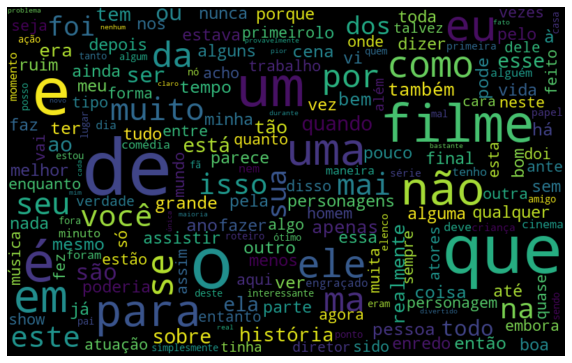

In [92]:
#aqui eu ploto a nuvem de palavras mais recorrentes usando o Matplotlib,e fazendo alguns ajustes como tamanho do teste e fontes

plt.figure(figsize=(10,7))
plt.imshow(nuvem_palvras, interpolation='bilinear')
plt.axis("off")
plt.show()

## Separando as fontes positivas e negativas dentro do WordCloud

In [93]:
# vou criar duas funcoes, uma para palabras positivas e a outra para palavras negativas, contendo também motificacoes de fontes e tamanhos

def nuvem_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query("sentiment == 'neg'")
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])

    nuvem_palvras = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palvras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [94]:
def nuvem_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query("sentiment == 'pos'")
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])

    nuvem_palvras = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palvras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

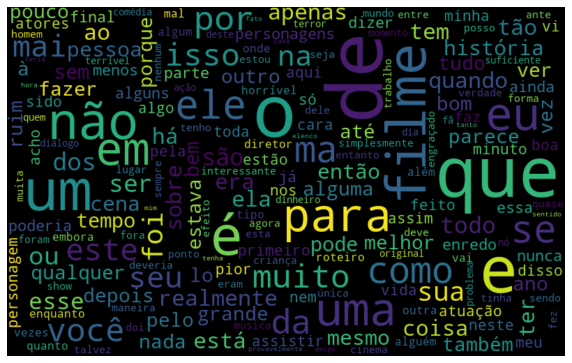

In [95]:
#palavras negativas
nuvem_palavras_neg(resenha, "text_pt")

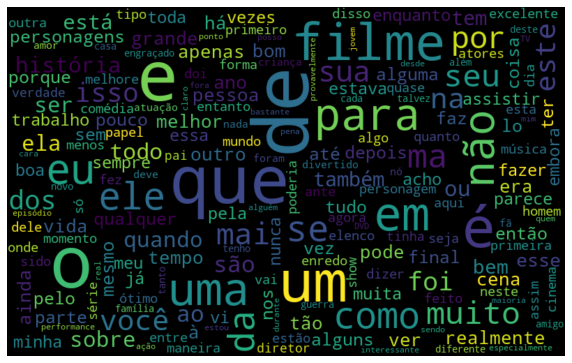

In [97]:
#palavras positivas
nuvem_palavras_pos(resenha, "text_pt")